In [1]:
# drive dosya erişim
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Gerekli kütüphaneleri içe aktarma
import numpy as np               # Lineer cebir
import pandas as pd              # Veri işleme, CSV dosyası giriş/çıkışı için (ör. pd.read_csv)
import matplotlib.pyplot as plt  # Veri görselleştirme
import seaborn as sns            # Görselleştirme için Python kütüphanesi

In [5]:
# Veri setini içe aktardım
path="/content/drive/MyDrive/Regresyon_Kümeleme_Sınıflandırma_Data/Mall_Customers.csv"
df=pd.read_csv(path)

# Keşifsel Veri Analizi
# Bu, denetimsiz öğrenme olduğu için Etiket (Çıktı Sütunu) bilinmiyor

df.head(10)  # Veri setinin ilk 10 satırını yazdırma

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
df.shape  # Veri setindeki toplam satır ve sütun sayısı

(200, 5)

In [7]:
df.info()  # Tüm sütunlarda 200 giriş olduğu için eksik değer bulunmamaktadır.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()  # Eksik değer hesaplaması

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
### Model için Özellik Seçimi
# Yalnızca 2 özellik (Yıllık Gelir ve Harcama Puanı) dikkate alındığında ve Etiket mevcut değilse
X = df.iloc[:, [3, 4]].values


In [11]:
# Model Oluşturma
# Optimum küme sayısını belirlemek için KMeans Algoritması, Elbow Yöntemi kullanarak KMeans++ kullanılır
# KMeans için K'yı belirlemek için ELBOW Yöntemini kullanarak, KMEANS++ Hesaplaması

from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    # inertia_, veri noktalarını kümelere ayırmak için kullanılan formüldür


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

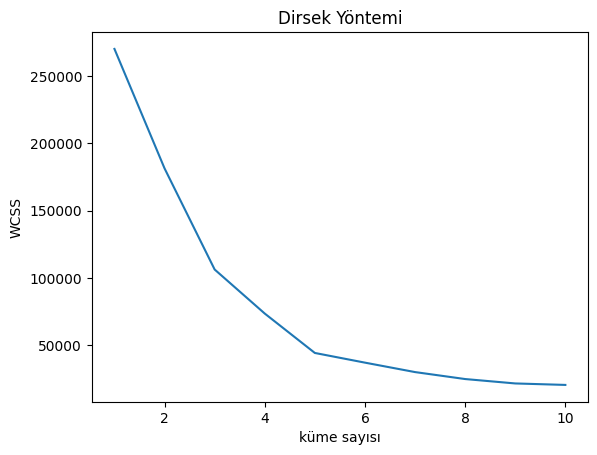

In [12]:
# Optimal K değerini almak için ELBOW yöntemini görselleştirme
plt.plot(range(1, 11), wcss)
plt.title('Dirsek Yöntemi')
plt.xlabel('küme sayısı')
plt.ylabel('WCSS')
plt.show()